Darknet is an open source neural network framework. It is a fast and highly accurate (accuracy for custom trained model depends on training data, epochs, batch size and some other factors) framework for real time object detection (also can be used for images).
YOLOv3 is the latest variant of a popular object detection algorithm YOLO – You Only Look Once.


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 14309 (delta 2), reused 5 (delta 2), pack-reused 14291
Receiving objects: 100% (14309/14309), 12.94 MiB | 23.84 MiB/s, done.
Resolving deltas: 100% (9753/9753), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile #The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-09-21 10:08:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   157KB/s    in 23m 37s 

2020-09-21 10:32:32 (171 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'10th T, Eng, M, S, S.S_ E.M.pdf'
 20141102_151019.mp4
'22 Dec 2019 22:49:47.jpeg'
 AAI_W5.docx
'Adobe Scan 16 Aug 2020.pdf'
 AI_Week4.docx
'ANALYTICS AND AI.docx'
 AUD-20140420-WA0006.m4a
 AUD-20140509-WA0002.m4a
'ayesha mubin m (3).pdf'
 BCA.jpg
 BDS_W5.docx
 BDS_Week4.docx
'Big Data Security.docx'
'CASE STUDY - AAI (1).pptx'
 Classroom
'Colab Notebooks'
 datarepeater.txt
 DL-AVC1.pdf
'DL lab.pdf'
 DLL-AVC1.pdf
 DLL_W5.pdf
 DLL_W6.pdf
 DLL_W7.pdf
 DLP-week4.pdf
 DL_W5.pdf
 DL_W6.pdf
 DL-Week4.pdf
'Feed Forward Networks.pdf'
'Geeks Talk 101 Chennai-compressed.pdf'
 IMG_0001.JPG
 IMG_0002.JPG
 IMG_0003.JPG
 IMG_0004.JPG
 IMG_0005.JPG
 IMG_0006.JPG
 IMG_0007.JPG
 IMG_0008.JPG
 IMG_0009.JPG
 IMG_0010.JPG
 IMG_0011.JPG
 IMG_0012.JPG
 IMG_0013.JPG
 IMG_0014.JPG
 IMG_0015.JPG
 IMG_0016.JPG
 IMG_0017.JPG
 IMG_0018.JPG
 IMG_0019.JPG
 IMG_0020.JPG
 IMG_0021.JPG
 IMG_0022.JPG
 IMG_0023.JPG
 IMG_0024.JPG
 IMG_0025.JPG
 IMG_0026.JPG
 IMG_0027.JPG
 IMG_0028.JPG
 IMG_0029.JPG
 IMG_0030.JPG
 IMG_003

In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
#i created yolov3 on my drive and stored the obj.zip file 
!ls /mydrive/yolov3

backup		   images.zip  obj.names  README.md
generate_train.py  obj.data    obj.zip	  yolov3_custom.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/010d4df2a4e92e15.jpg  
  inflating: data/obj/010d4df2a4e92e15.txt  
  inflating: data/obj/03410e2adeb95981.jpg  
  inflating: data/obj/03410e2adeb95981.txt  
  inflating: data/obj/0453e7a4e665440b.jpg  
  inflating: data/obj/0453e7a4e665440b.txt  
  inflating: data/obj/05359f92559e737b.jpg  
  inflating: data/obj/05359f92559e737b.txt  
  inflating: data/obj/0c74b1b659bbea89.jpg  
  inflating: data/obj/0c74b1b659bbea89.txt  
  inflating: data/obj/0c9f40ea3014c553.jpg  
  inflating: data/obj/0c9f40ea3014c553.txt  
  inflating: data/obj/221fea76e6436258.jpg  
  inflating: data/obj/221fea76e6436258.txt  
  inflating: data/obj/32c133653f227fe9.jpg  
  inflating: data/obj/32c133653f227fe9.txt  
  inflating: data/obj/3b2880d382f4ffe2.jpg  
  inflating: data/obj/3b2880d382f4ffe2.txt  
  inflating: data/obj/3bc3f1339b345d32.jpg  
  inflating: data/obj/3bc3f1339b345d32.txt  
  inflating: data/obj/4a41dcad5ec58aa9.jpg  
  inflating: data/obj/4a41dcad5ec5

In [ ]:
#upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg


# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-09-21 10:34:59--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   128KB/s    in 15m 9s  

2020-09-21 10:50:09 (175 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.378219, GIOU: 0.232117), Class: 0.468292, Obj: 0.001349, No Obj: 0.000274, .5R: 0.000000, .75R: 0.000000, count: 3, class_loss = 0.964720, iou_loss = 1.712600, total_loss = 2.677320 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000107, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000342, iou_loss = 0.000000, total_loss = 0.000342 
 total_bbox = 38721, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.577619, GIOU: 0.526721), Class: 0.925220, Obj: 0.063030, No Obj: 0.001843, .5R: 1.000000, .75R: 0.000000, count: 4, class_loss = 0.942205, iou_loss = 0.534432, total_loss = 1.476637 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 

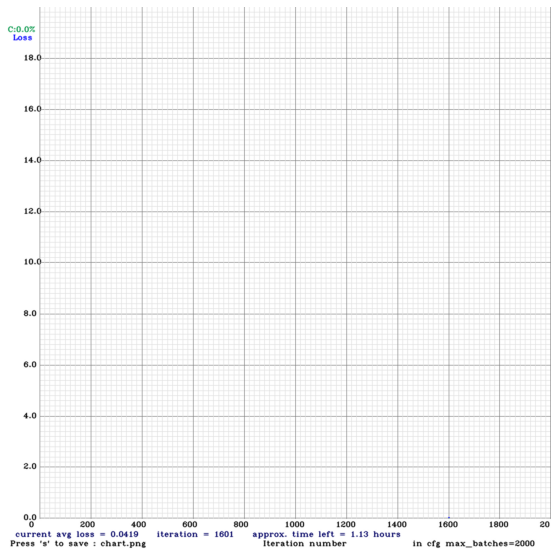

In [ ]:
imShow('chart.png')

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 15

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 B

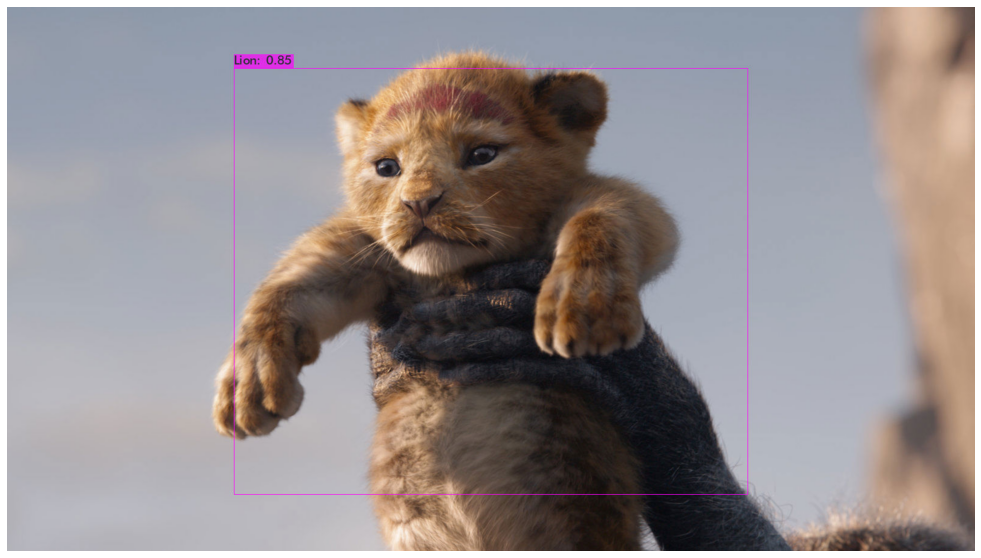

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /content/2.jpg -thresh 0.3
imShow('predictions.jpg')

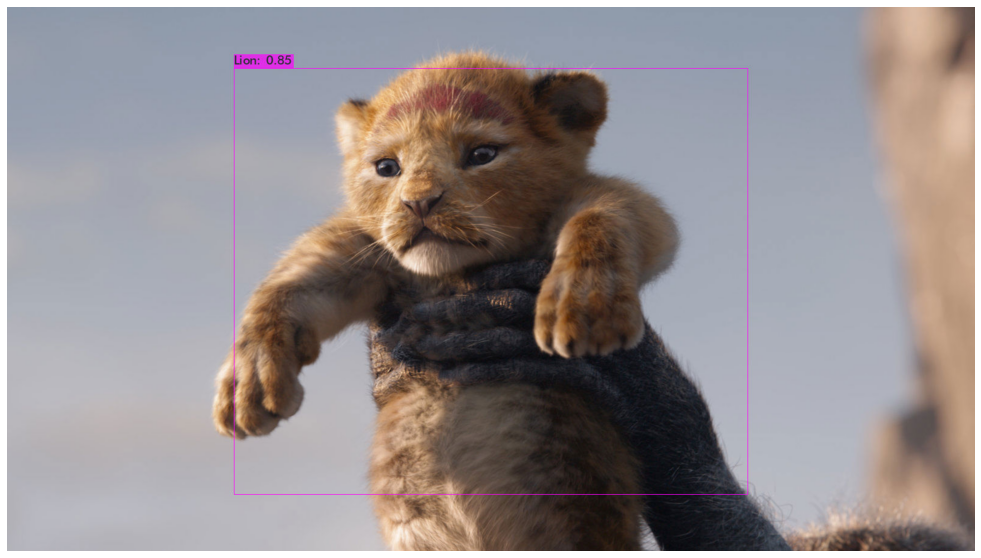

In [ ]:
imShow('predictions.jpg')